# **Zipf’s Law Analysis on Selena Gomez Song Lyrics**



1. Parth Tandalwade - parth.k@adypu.edu.in
2. Ansh Sharma - ansh.sharma@adypu.edu.in
3. Yatin Bhisht - yatin.bisht@adypu.edu.in
4. Ved Vadnere  -  ved.vadnere@adypu.edu.in

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter
from google.colab import files
uploaded = files.upload()


Saving SelenaGomez.csv to SelenaGomez.csv


In [ ]:
# Load the CSV file by choosing
df = pd.read_csv("SelenaGomez.csv")  # Or use the correct filename
print(df.columns)  # Check the column names

# Combine all lyrics into one string
all_lyrics = ' '.join(df['Lyric'].dropna().astype(str).tolist())  # Replace 'lyrics' with correct column name


Index(['Unnamed: 0', 'Artist', 'Title', 'Album', 'Year', 'Date', 'Lyric'], dtype='object')


In [ ]:
# Lowercase and remove punctuation
clean_lyrics = all_lyrics.lower()
clean_lyrics = re.sub(r'[^\w\s]', '', clean_lyrics)

# Tokenize (split) into words
words = clean_lyrics.split()
print(f"Total Words: {len(words)}")


Total Words: 47748


In [ ]:
# Count word frequencies
word_counts = Counter(words)

# Get words and their counts sorted by frequency
most_common = word_counts.most_common()
print(f"Unique Words: {len(most_common)}")




Unique Words: 2351


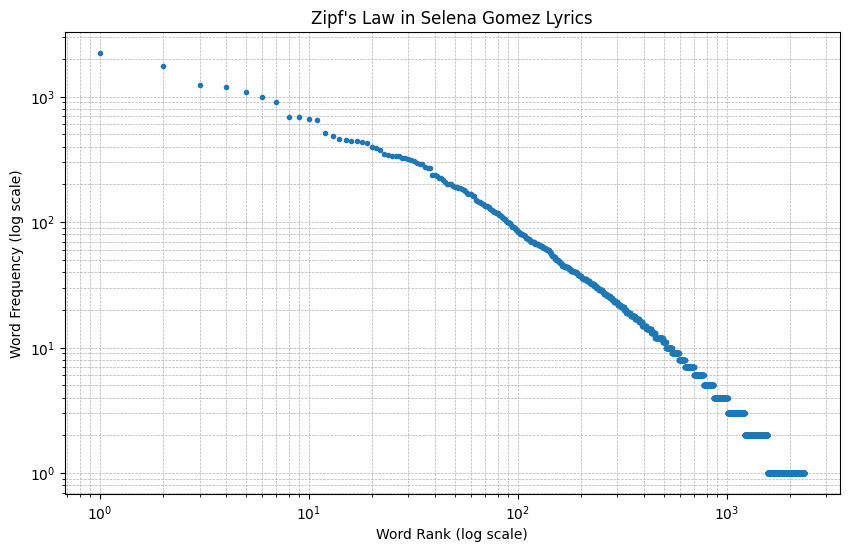

In [ ]:
# Get ranks and frequencies
ranks = np.arange(1, len(most_common) + 1)
frequencies = [freq for word, freq in most_common]

# Plot Rank vs Frequency on log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.', linestyle='none')
plt.title("Zipf's Law in Selena Gomez Lyrics")
plt.xlabel("Word Rank (log scale)")
plt.ylabel("Word Frequency (log scale)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()


In [ ]:
words_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])
words_df['Rank'] = range(1, len(words_df)+1)

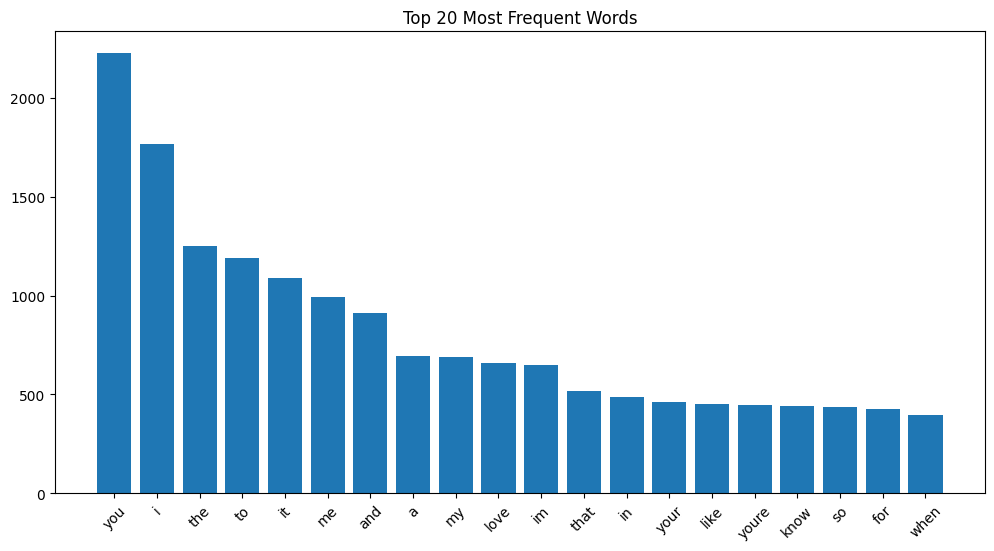

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(words_df['Word'].head(20), words_df['Frequency'].head(20))
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

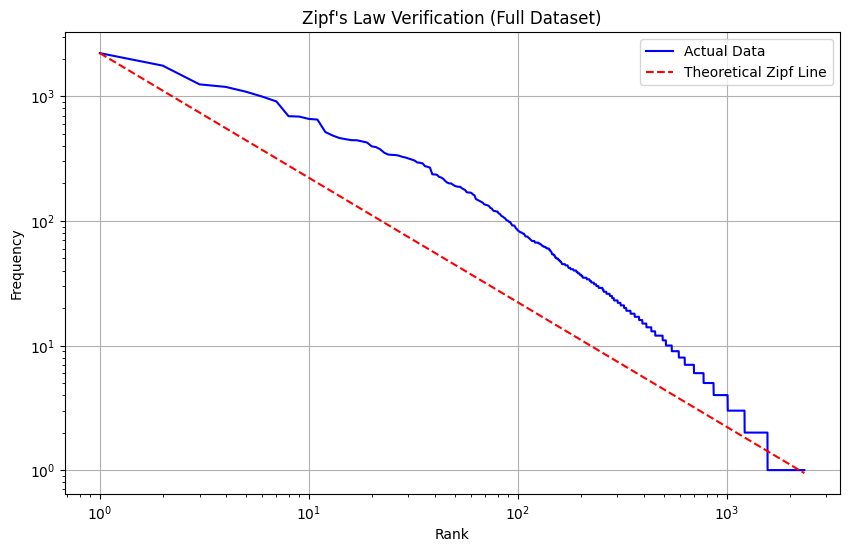

In [ ]:
plt.figure(figsize=(10,6))
plt.loglog(words_df['Rank'], words_df['Frequency'], 'b-', label='Actual Data')
plt.plot(words_df['Rank'], words_df['Frequency'][0]/words_df['Rank'],
         'r--', label='Theoretical Zipf Line')
plt.title('Zipf\'s Law Verification (Full Dataset)')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

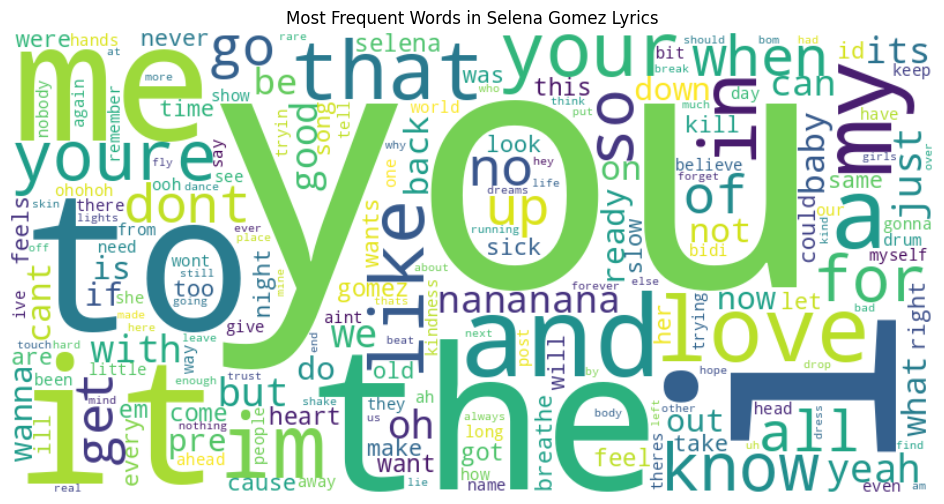

In [ ]:
from wordcloud import WordCloud

# Generate word cloud from lyrics
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Selena Gomez Lyrics")
plt.show()




1. **Parth Tandalwade** → Data Cleaning , Data Handling, Data Visulisation , Understanding and Implementing Zipf's Law

2. **Ansh Sharma**           →  Making of PPT , Data Visulisation , Understanding and Implementing Zipf's Law

3. **Ved Vadnere**             → Data Research , Understanding Zipf's Law

4. **Yatin**                             → Data Analysis , Understanding  Zipf's Law , Reviewer

